<a href="https://colab.research.google.com/github/CharlesPrado23/Bootcamp_TurmaNoite/blob/main/Series_temporais/Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
Y = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv', index_col=0, parse_dates=True)

In [ ]:
Y

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
def test_stationary(timeseries):
  print ('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries.dropna(), autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput.to_string())

  if dftest[1] <= 0.05:
      print("Strong evidence against the null hypothesis")
      print("Reject the null hypothesis")
      print("Data has no unit root and is stationary")
  else:
      print("Weak evidence against the null hypothesis")
      print("Fail to reject the null hypothesis")
      print("Data has a unit root and is non-stationary")

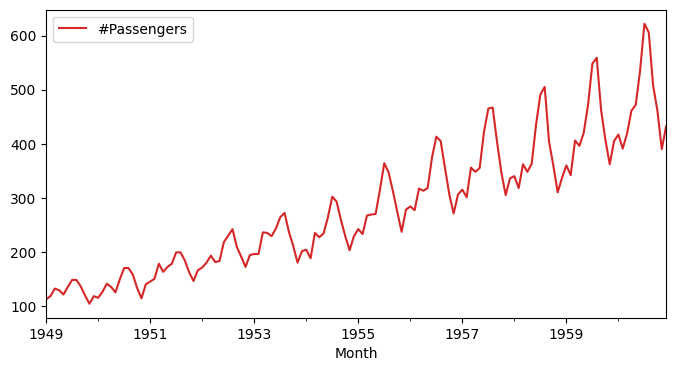

In [ ]:
Y.plot(figsize=(8,4), color="tab:red");

In [ ]:
test_stationary(Y)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


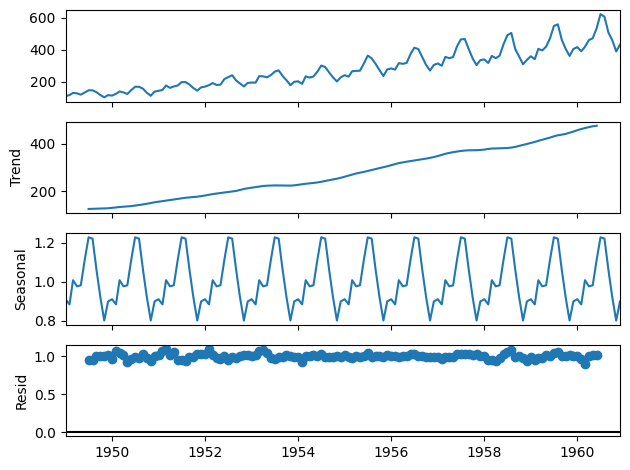

In [ ]:
decompose_result = seasonal_decompose(Y, model="multiplicative")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

In [ ]:
Y_log = Y["#Passengers"].apply(lambda x : np.log(x))


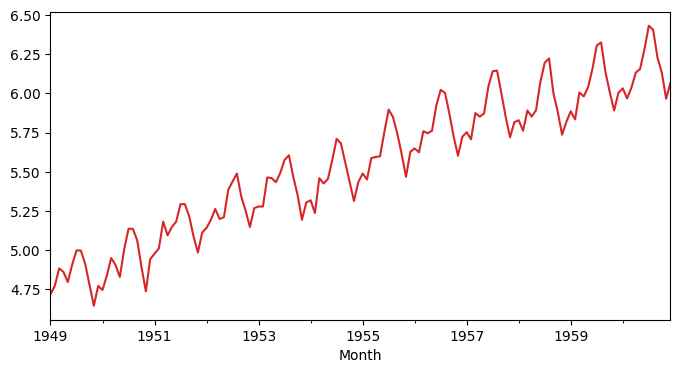

In [ ]:
Y_log.plot(figsize=(8,4), color="tab:red");

In [ ]:
test_stationary(Y_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
Ydiff = Y_log-Y_log.shift()

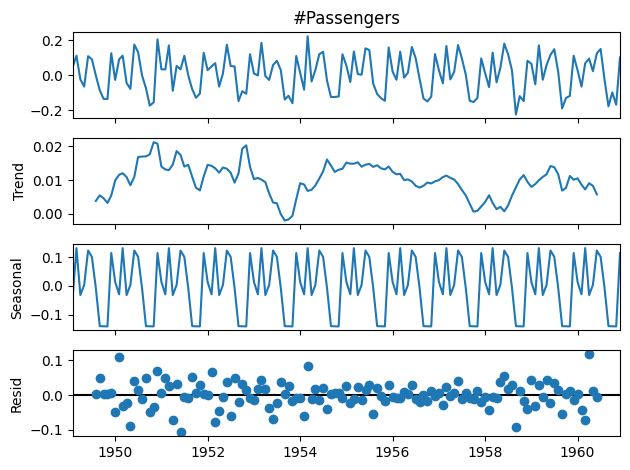

In [ ]:
decompose_result = seasonal_decompose(Ydiff.iloc[1:], model="aditive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

In [ ]:
test_stationary(Ydiff)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
Y_rolling = Y_log - Y_log.rolling(window = 12).mean()

In [ ]:
Y_rolling

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: #Passengers, Length: 144, dtype: float64

In [ ]:
Y_rolling = Y_rolling.dropna()

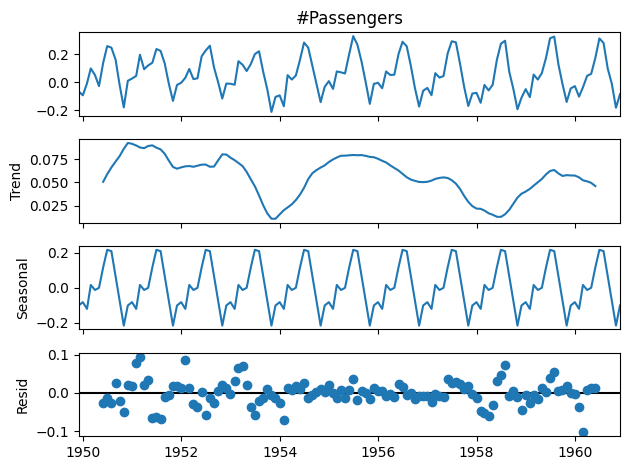

In [ ]:
decompose_result = seasonal_decompose(Y_rolling, model="aditive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

In [ ]:
test_stationary(Y_rolling)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
Y_st =  Y_rolling- Y_rolling.shift()

In [ ]:
Y_st = Y_st.dropna()

In [ ]:
Y_st.values

array([-0.02795527,  0.08588334,  0.10698149, -0.04727364, -0.07967131,
        0.16740994,  0.12030328, -0.01154885, -0.08569842, -0.18151471,
       -0.16180131,  0.19119749,  0.01577452,  0.0193721 ,  0.15172962,
       -0.10373963,  0.02714588,  0.0194693 ,  0.09839574, -0.01312553,
       -0.09106413, -0.14377669, -0.12460706,  0.11418572,  0.01593162,
        0.03609983,  0.06299112, -0.07292206,  0.00582315,  0.15811628,
        0.04151971,  0.03455568, -0.15722002, -0.10378391, -0.11843627,
        0.10737448, -0.00111443, -0.00709648,  0.16895534, -0.02600366,
       -0.04454983,  0.05029224,  0.07139851,  0.02011427, -0.14821908,
       -0.12450073, -0.16268981,  0.10739416,  0.01148131, -0.07820531,
        0.22349741, -0.03174921,  0.02857117,  0.11372068,  0.12327142,
       -0.03645195, -0.13074187, -0.12992805, -0.13053679,  0.10964793,
        0.04098091, -0.05578231,  0.12557161, -0.00668406, -0.00821449,
        0.13943205,  0.12902066, -0.0619251 , -0.12183619, -0.14

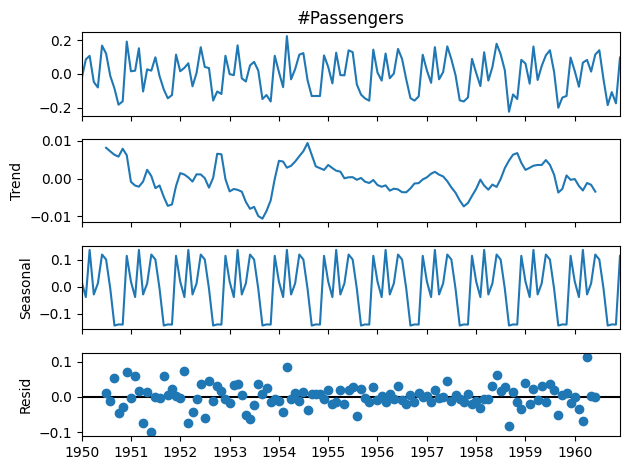

In [ ]:
decompose_result = seasonal_decompose(Y_st, model="aditive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

In [ ]:
test_stationary(Y_st)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
